In [1]:
from __future__ import print_function, division
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from params import fpath, figure_path
%matplotlib inline
%load_ext autoreload
%autoreload 2

# location to save figures
import os
cwd = os.getcwd()
#figure_path = cwd + '/../figures/'
#figure_path = params.figure_path

# Section 3

In this notebook, I create the plots needed for section 3

## central mis-alignment

### load measurements

In [14]:
mus = np.linspace(0.99,0.0,10)

rbins = np.logspace(-1,1.8,29)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0

from astropy.io import ascii
#fpath = '/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/data/'
#fpath = params.fpath

Nreal = 1000
Nbins = len(rbins)-1
ed = np.zeros((10, Nbins))
ee = np.zeros((10, Nbins))
ed_err = np.zeros((10, Nbins))
ee_err = np.zeros((10, Nbins))
for i, mu in enumerate(mus):
    eds = np.zeros((Nreal, Nbins))
    ees = np.zeros((Nreal, Nbins))
    for j in range(0,Nreal):
        try:
            fname = 'smdpl_400_'+ '{0:.2f}'.format(mus[i]) +'_0.99_ed_ee_'+str(j).zfill(4)+'.dat'
            data = ascii.read(fpath+fname) 
            eds[j,:] = data['ed']
            ees[j,:] = data['ee']
        except IOError:
            eds = eds[:j]
            ees = ees[:j]
            break
    print(j)
    ed[i,:] = np.mean(eds,axis=0)
    ee[i,:] = np.mean(ees,axis=0)
    ed_err[i,:] = np.std(eds,axis=0)
    ee_err[i,:] = np.std(ees,axis=0)

999
999
999
999
999
999
999
999
999
999


In [15]:
from astropy.io import ascii
#fpath = '/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/data/'
#fpath = params.fpath
fname = 'smdpl_400_ed.dat'
halo_ed = ascii.read(fpath+fname) 
fname = 'smdpl_400_ee.dat'
halo_ee = ascii.read(fpath+fname) 

In [16]:
f_ed_err = halo_ed['err']/halo_ed['ed']
for i in range(0,10):
    ed_err[i,:] = np.sqrt(ed_err[i,:]**2 + (f_ed_err*ed[i,:])**2)

f_ee_err = halo_ee['err']/halo_ee['ee']
for i in range(0,10):
    ee_err[i,:] = np.sqrt(ee_err[i,:]**2 + (f_ee_err*ee[i,:])**2)

### plot results

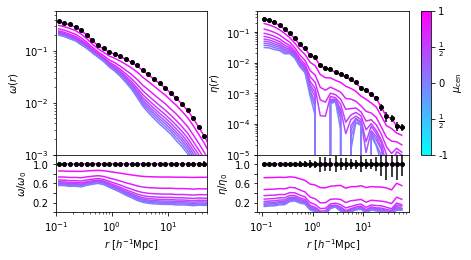

In [5]:
ps = np.linspace(1,0,10)
colors = np.linspace(1.0,0.5,len(ps))
colors = plt.cm.cool(colors)

r_sample=np.logspace(-1,2,1000)

fig = plt.figure(figsize=(7.0,4.0))

# ED
rect = (0.1,0.4,0.3,0.5) # [left, bottom, width, height]
ax = plt.axes(rect)
l0 = ax.errorbar(rbin_centers, halo_ed['ed'], yerr=halo_ed['err'],
                 fmt='o', color='black', ms=4)
for i in range(10):
    #ax.errorbar(rbin_centers, ed[i], yerr=ed_err[i], fmt='o')
    plt.plot(rbin_centers, ed[i], '-', color=colors[i])
ax.set_xscale('log')
ax.xaxis.set_ticklabels([])
ax.set_xlim([0.1,50])

ax.set_yscale('log')
ax.set_ylabel(r'$\omega(r)$')
ax.set_ylim([0.001,0.6])

rect = (0.1,0.2,0.3,0.2) # [left, bottom, width, height]
ax = plt.axes(rect)
ax.set_xscale('log')
ax.set_xlabel(r'$r~[h^{-1}\rm Mpc]$')
ax.set_xlim([0.1,50])
ax.set_ylim([0,1.2])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])
ax.set_yticklabels(['','0.2','','0.6','','1.0',''])
ax.set_ylabel(r'$\omega/\omega_{0}$')

ax.errorbar(halo_ed['r'], halo_ed['ed']/halo_ed['ed'], yerr=halo_ed['err']/halo_ed['ed'],
            fmt='o', color='black', ms=4)
for i in range(10):
    plt.plot(rbin_centers, ed[i]/ed[0], '-', color=colors[i])




# EE
rect = (0.5,0.4,0.3,0.5) # [left, bottom, width, height]
ax = plt.axes(rect)
l0 = ax.errorbar(rbin_centers, halo_ee['ee'], yerr=halo_ee['err'],
                 fmt='o', color='black', ms=4)
for i in range(10):
    #ax.errorbar(rbin_centers, ee[i], yerr=ee_err[i], fmt='o')
    plt.plot(rbin_centers, ee[i], '-', color=colors[i])
    
ax.set_xscale('log')
#ax.set_xlim([0.1,50])
ax.set_yscale('log')
ax.xaxis.set_ticklabels([])
ax.set_ylabel(r'$\eta(r)$')
ax.set_ylim([0.00001,0.5])


rect = (0.5,0.2,0.3,0.2) # [left, bottom, width, height]
ax = plt.axes(rect)
ax.set_xscale('log')
ax.set_xlabel(r'$r~[h^{-1}\rm Mpc]$')
#ax.set_xlim([0.1,50])
ax.set_ylim([0,1.2])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])
ax.set_yticklabels(['','0.2','','0.6','','1.0',''])
ax.set_ylabel(r'$\eta/\eta_{0}$')

ax.errorbar(halo_ee['r'], halo_ee['ee']/halo_ee['ee'], yerr=halo_ee['err']/halo_ee['ee'],
            fmt='o', color='black', ms=4)
for i in range(10):
    plt.plot(rbin_centers, ee[i]/ee[0], '-', color=colors[i])

sc = plt.scatter(ps*0.0, ps*0.0, c=ps, cmap = 'cool', vmin=-1, vmax=1.0, s=0)
cax = fig.add_axes([0.825, 0.4, 0.02, 0.5]) 
cbar = fig.colorbar(sc, cax=cax, ticks=[-1,-0.5,0, 0.5, 1])
cbar.ax.set_yticklabels(['-1', r'$\frac{1}{2}$', '0', r'$\frac{1}{2}$', '1'])
cbar.ax.set_ylabel(r'$\mu_{\rm cen}$')

plt.show()

fname = 'cen_degrade_no_fit.pdf'
#fig.savefig(figure_path + fname, dpi=300)

## satellite misalignments

### load measurements

In [8]:
mus = np.linspace(0.99,0.0,10)

rbins = np.logspace(-1,1.8,29)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0

from astropy.io import ascii
#fpath = '/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/data/'
#fpath = params.fpath

Nreal = 1000
Nbins = len(rbins)-1
ed = np.zeros((10, Nbins))
ee = np.zeros((10, Nbins))
ed_err = np.zeros((10, Nbins))
ee_err = np.zeros((10, Nbins))
for i, mu in enumerate(mus):
    eds = np.zeros((Nreal, Nbins))
    ees = np.zeros((Nreal, Nbins))
    for j in range(0,Nreal):
        try:
            fname = 'smdpl_400_0.99_'+'{0:.2f}'.format(mus[i])+'_ed_ee_'+str(j).zfill(4)+'.dat'
            data = ascii.read(fpath+fname) 
            eds[j,:] = data['ed']
            ees[j,:] = data['ee']
        except IOError:
            eds = eds[:j]
            ees = ees[:j]
            break
    print(j)
    ed[i,:] = np.mean(eds,axis=0)
    ee[i,:] = np.mean(ees,axis=0)
    ed_err[i,:] = np.std(eds,axis=0)
    ee_err[i,:] = np.std(ees,axis=0)

999
999
999
999
999
999
999
999
999
999


In [9]:
from astropy.io import ascii
#fpath = '/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/data/'
#fpath = params.fpath
fname = 'smdpl_400_ed.dat'
halo_ed = ascii.read(fpath+fname) 
fname = 'smdpl_400_ee.dat'
halo_ee = ascii.read(fpath+fname) 

In [10]:
f_ed_err = halo_ed['err']/halo_ed['ed']
for i in range(0,10):
    ed_err[i,:] = np.sqrt(ed_err[i,:]**2 + (f_ed_err*ed[i,:])**2)

f_ee_err = halo_ee['err']/halo_ee['ee']
for i in range(0,10):
    ee_err[i,:] = np.sqrt(ee_err[i,:]**2 + (f_ee_err*ee[i,:])**2)

### plot results

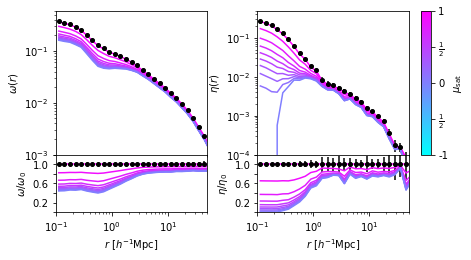

In [9]:
ps = np.linspace(1,0,10)
colors = np.linspace(1.0,0.5,len(ps))
colors = plt.cm.cool(colors)

r_sample=np.logspace(-1,2,1000)

fig = plt.figure(figsize=(7.0,4.0))

# ED
rect = (0.1,0.4,0.3,0.5) # [left, bottom, width, height]
ax = plt.axes(rect)
l0 = ax.errorbar(rbin_centers, halo_ed['ed'], yerr=halo_ed['err'],
                 fmt='o', color='black', ms=4)
for i in range(10):
    #ax.errorbar(rbin_centers, ed[i], yerr=ed_err[i], fmt='o')
    plt.plot(rbin_centers, ed[i], '-', color=colors[i])
ax.set_xscale('log')
ax.xaxis.set_ticklabels([])
ax.set_xlim([0.1,50])

ax.set_yscale('log')
ax.set_ylabel(r'$\omega(r)$')
ax.set_ylim([0.001,0.6])

rect = (0.1,0.2,0.3,0.2) # [left, bottom, width, height]
ax = plt.axes(rect)
ax.set_xscale('log')
ax.set_xlabel(r'$r~[h^{-1}\rm Mpc]$')
ax.set_xlim([0.1,50])
ax.set_ylim([0,1.2])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])
ax.set_yticklabels(['','0.2','','0.6','','1.0',''])
ax.set_ylabel(r'$\omega/\omega_{0}$')

ax.errorbar(halo_ed['r'], halo_ed['ed']/halo_ed['ed'], yerr=halo_ed['err']/halo_ed['ed'],
            fmt='o', color='black', ms=4)
for i in range(10):
    plt.plot(rbin_centers, ed[i]/ed[0], '-', color=colors[i])


# EE
rect = (0.5,0.4,0.3,0.5) # [left, bottom, width, height]
ax = plt.axes(rect)
l0 = ax.errorbar(rbin_centers, halo_ee['ee'], yerr=halo_ee['err'],
                 fmt='o', color='black', ms=4)
for i in range(10):
    #ax.errorbar(rbin_centers, ee[i], yerr=ee_err[i], fmt='o')
    plt.plot(rbin_centers, ee[i], '-', color=colors[i])
    
ax.set_xscale('log')
ax.set_xlim([0.1,50])
ax.set_yscale('log')
ax.xaxis.set_ticklabels([])
ax.set_ylabel(r'$\eta(r)$')
ax.set_ylim([0.0001,0.5])


rect = (0.5,0.2,0.3,0.2) # [left, bottom, width, height]
ax = plt.axes(rect)
ax.set_xscale('log')
ax.set_xlabel(r'$r~[h^{-1}\rm Mpc]$')
ax.set_xlim([0.1,50])
ax.set_ylim([0,1.2])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])
ax.set_yticklabels(['','0.2','','0.6','','1.0',''])
ax.set_ylabel(r'$\eta/\eta_{0}$')

ax.errorbar(halo_ee['r'], halo_ee['ee']/halo_ee['ee'], yerr=halo_ee['err']/halo_ee['ee'],
            fmt='o', color='black', ms=4)
for i in range(10):
    plt.plot(rbin_centers, ee[i]/ee[0], '-', color=colors[i])

sc = plt.scatter(ps*0.0, ps*0.0, c=ps, cmap = 'cool', vmin=-1, vmax=1.0, s=0)
cax = fig.add_axes([0.825, 0.4, 0.02, 0.5]) 
cbar = fig.colorbar(sc, cax=cax, ticks=[-1,-0.5,0, 0.5, 1])
cbar.ax.set_yticklabels(['-1', r'$\frac{1}{2}$', '0', r'$\frac{1}{2}$', '1'])
cbar.ax.set_ylabel(r'$\mu_{\rm sat}$')

plt.show()

fname = 'sat_degrade_no_fit.pdf'
#fig.savefig(figure_path + fname, dpi=300)

## Use Fitting Functions

In [5]:
from intrinsic_alignments.ia_models.fitting_functions import ee_fitting_function

In [17]:
f = ee_fitting_function()
f.params['alpha']=-0.9
f.params['gamma2']=10.0
f.params['B3']=2.0
f.params['gamma1']=1.0
print(f.params)
f.param_bounds['gamma2']=[1.0,10]
f.param_bounds['beta']=[-3,-1]
f.param_bounds['alpha']=[-1.0,-0.8]
f.param_bounds['B2']=[10,25]
f.param_bounds['k']=[0.1,0.3]
f.param_bounds['B1']=[0.2,1.0]
f.param_bounds['gamma1']=[0.5,1.1]
f.param_bounds['B3']=[0.2,3.0]

keys = ['A1', 'B1', 'gamma1',
        'A2', 'B2', 'alpha', 'beta', 'k',
        'B3', 'gamma2']
params = []

i=0
x = halo_ee['r']
y = halo_ee['ee']
err = halo_ee['err']
popt, pcov = f.fit(x,y,err)
params.append(dict(zip(keys, popt)))

for i in range(1,10):
    x = halo_ee['r']
    y = ee[i]
    err = ee_err[i]
    f.params['B3']=2.0
    popt, pcov = f.fit(x,y,err)
    params.append(dict(zip(keys, popt)))

{'A1': 0.5, 'B1': 0.2, 'gamma1': 1.0, 'A2': 0.0005, 'B2': 20.0, 'alpha': -0.9, 'beta': -2.3, 'k': 0.1, 'B3': 2.0, 'gamma2': 10.0}


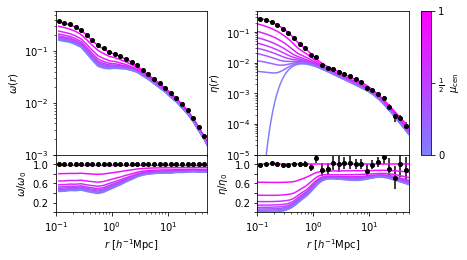

In [12]:
ps = np.linspace(1,0,10)
colors = np.linspace(1.0,0.5,len(ps))
colors = plt.cm.cool(colors)

r_sample=np.logspace(-1,2,1000)

fig = plt.figure(figsize=(7.0,4.0))

# ED
rect = (0.1,0.4,0.3,0.5) # [left, bottom, width, height]
ax = plt.axes(rect)
l0 = ax.errorbar(rbin_centers, halo_ed['ed'], yerr=halo_ed['err'],
                 fmt='o', color='black', ms=4)
for i in range(10):
    #ax.errorbar(rbin_centers, ed[i], yerr=ed_err[i], fmt='o')
    plt.plot(rbin_centers, ed[i], '-', color=colors[i])
ax.set_xscale('log')
ax.xaxis.set_ticklabels([])
ax.set_xlim([0.1,50])

ax.set_yscale('log')
ax.set_ylabel(r'$\omega(r)$')
ax.set_ylim([0.001,0.6])

rect = (0.1,0.2,0.3,0.2) # [left, bottom, width, height]
ax = plt.axes(rect)
ax.set_xscale('log')
ax.set_xlabel(r'$r~[h^{-1}\rm Mpc]$')
ax.set_xlim([0.1,50])
ax.set_ylim([0,1.2])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])
ax.set_yticklabels(['','0.2','','0.6','','1.0',''])
ax.set_ylabel(r'$\omega/\omega_{0}$')

l0 = ax.errorbar(rbin_centers, halo_ed['ed']/halo_ed['ed'],
                 yerr=halo_ee['err']/halo_ed['ed'],
                 fmt='o', color='black', ms=4)
for i in range(10):
    plt.plot(rbin_centers, ed[i]/halo_ed['ed'], '-', color=colors[i])




# EE
rect = (0.5,0.4,0.3,0.5) # [left, bottom, width, height]
ax = plt.axes(rect)
l0 = ax.errorbar(rbin_centers, halo_ee['ee'], yerr=halo_ee['err'],
                 fmt='o', color='black', ms=4)


for i in range(10):
    plt.plot(r_sample, f.fitting_function(r_sample,params[i]), '-', color=colors[i])
    
ax.set_xscale('log')
ax.set_xlim([0.1,50])
ax.set_yscale('log')
ax.xaxis.set_ticklabels([])
ax.set_ylabel(r'$\eta(r)$')
ax.set_ylim([0.00001,0.5])


rect = (0.5,0.2,0.3,0.2) # [left, bottom, width, height]
ax = plt.axes(rect)
ax.set_xscale('log')
ax.set_xlabel(r'$r~[h^{-1}\rm Mpc]$')
ax.set_xlim([0.1,50])
ax.set_ylim([0,1.2])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])
ax.set_yticklabels(['','0.2','','0.6','','1.0',''])
ax.set_ylabel(r'$\eta/\eta_{0}$')

l0 = ax.errorbar(rbin_centers, halo_ee['ee']/f.fitting_function(rbin_centers,params[0]),
                 yerr=halo_ee['err']/f.fitting_function(rbin_centers,params[0]),
                 fmt='o', color='black', ms=4)
for i in range(10):
    plt.plot(r_sample, f.fitting_function(r_sample,params[i])/f.fitting_function(r_sample,params[0]), '-', color=colors[i])


# color bar
sc = plt.scatter(ps*0.0, ps*0.0, c=ps, cmap = 'cool', vmin=-1, vmax=1.0, s=0)
cax = fig.add_axes([0.825, 0.4, 0.02, 0.5]) 
cbar = fig.colorbar(sc, cax=cax, ticks=[0.0,0.5,1.0], boundaries=np.linspace(0,1,1000))
#cbar.ax.set_yticklabels(['-1', r'$\frac{1}{2}$', '0', r'$\frac{1}{2}$', '1'])
cbar.ax.set_yticklabels(['0', r'$\frac{1}{2}$', '1'])
cbar.ax.set_ylabel(r'$\mu_{\rm cen}$')

plt.show()

fname = 'cen_degrade_w_bottom_panel.pdf'
#fig.savefig(figure_path + fname, dpi=300)

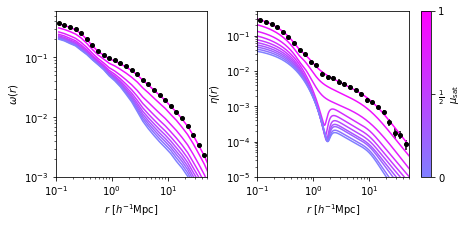

In [18]:
ps = np.linspace(1,0,10)
colors = np.linspace(1.0,0.5,len(ps))
colors = plt.cm.cool(colors)

r_sample=np.logspace(-1,2,1000)

fig = plt.figure(figsize=(7.0,3.3))

# ED
rect = (0.1,0.2,0.3,0.7) # [left, bottom, width, height]
ax = plt.axes(rect)
l0 = ax.errorbar(rbin_centers, halo_ed['ed'], yerr=halo_ed['err'],
                 fmt='o', color='black', ms=4)
for i in range(10):
    #ax.errorbar(rbin_centers, ed[i], yerr=ed_err[i], fmt='o')
    plt.plot(rbin_centers, ed[i], '-', color=colors[i])
ax.set_xscale('log')
ax.set_xlim([0.1,50])

ax.set_yscale('log')
ax.set_ylabel(r'$\omega(r)$')
ax.set_ylim([0.001,0.6])

ax.set_xlabel(r'$r~[h^{-1}\rm Mpc]$')
ax.set_xlim([0.1,50])

# EE
rect = (0.5,0.2,0.3,0.7) # [left, bottom, width, height]
ax = plt.axes(rect)
l0 = ax.errorbar(rbin_centers, halo_ee['ee'], yerr=halo_ee['err'],
                 fmt='o', color='black', ms=4)


for i in range(10):
    plt.plot(r_sample, f.fitting_function(r_sample,params[i]), '-', color=colors[i])
    
ax.set_xscale('log')
ax.set_xlim([0.1,50])
ax.set_yscale('log')
ax.set_ylabel(r'$\eta(r)$')
ax.set_ylim([0.00001,0.5])


ax.set_xlabel(r'$r~[h^{-1}\rm Mpc]$')

# color bar
sc = plt.scatter(ps*0.0, ps*0.0, c=ps, cmap = 'cool', vmin=-1, vmax=1.0, s=0)
cax = fig.add_axes([0.825, 0.2, 0.02, 0.7]) 
cbar = fig.colorbar(sc, cax=cax, ticks=[0.0,0.5,1.0], boundaries=np.linspace(0,1,1000))
#cbar.ax.set_yticklabels(['-1', r'$\frac{1}{2}$', '0', r'$\frac{1}{2}$', '1'])
cbar.ax.set_yticklabels(['0', r'$\frac{1}{2}$', '1'])
cbar.ax.set_ylabel(r'$\mu_{\rm sat}$')

plt.show()

fname = 'cen_degrade.pdf'
#fig.savefig(figure_path + fname, dpi=300)

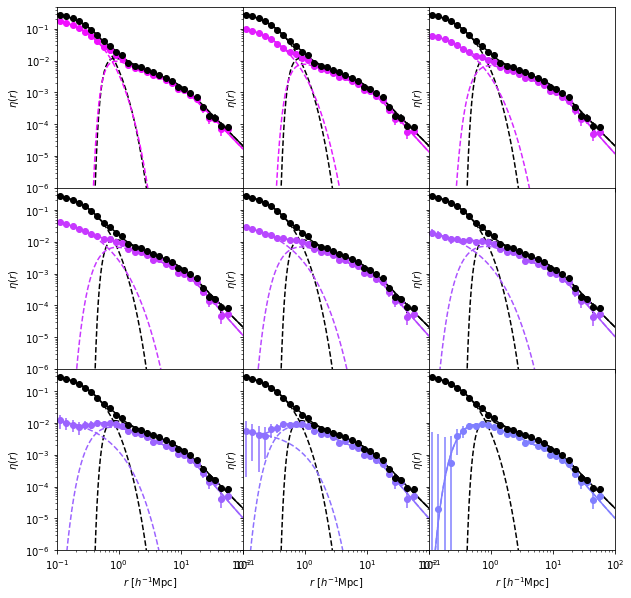

In [19]:
r_sample = np.logspace(-1,2,1000)
rbins = np.logspace(-1, 1.8, 29)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0

fig, axes = plt.subplots(3,3, figsize=(10,10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)
axes = axes.flatten()
for i in range(1,10):
    ax = axes[i-1]
    ax.plot(r_sample, f.fitting_function(r_sample,params[0]), '-', color='black')
    ax.plot(r_sample, f.f1(r_sample, params[0]), '--', color='black')
    ax.plot(r_sample, f.f2(r_sample, params[0]), '--', color='black')
    #ax.plot(r_sample, f.p1(r_sample, params[0]), ':', color='black')
    #ax.plot(r_sample, f.p2(r_sample, params[0]), ':', color='black')

    x = halo_ee['r']
    y = ee[i]
    err = ee_err[i]
    ax.errorbar(x,y,err, fmt='o', color=colors[i])
    ax.plot(r_sample, f.fitting_function(r_sample, params[i]), '-', color=colors[i])
    ax.plot(r_sample, f.f1(r_sample, params[i]), '--', color=colors[i])
    ax.plot(r_sample, f.f2(r_sample, params[i]), '--', color=colors[i])
    #ax.plot(r_sample, f.p1(r_sample, params[i]), ':', color='black')
    #ax.plot(r_sample, f.p2(r_sample, params[i]), ':', color='black')



    ax.errorbar(halo_ee['r'], halo_ee['ee'], halo_ee['err'], fmt='o', color='black')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim([0.000001,0.5])
    ax.set_xlim([0.1,100])
    ax.set_ylabel(r'$\eta(r)$')
    ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
plt.show()

fname = 'sat_degrade_panels.pdf'
#fig.savefig(figure_path + fname, dpi=300)

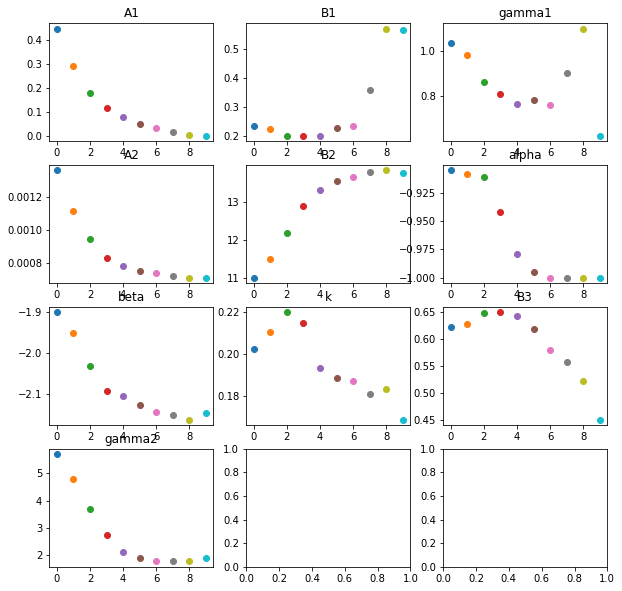

In [20]:
fig, axes = plt.subplots(4,3, figsize=(10,10))
axes = axes.flatten()
for j, key in enumerate(params[0].keys()):
    ax=axes[j]
    ax.set_title(key)
    for i in range(10):
        ax.plot([i],params[i][key], 'o')
plt.show()
    
    